# Fraud detection project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Fraud.csv")

In [3]:
df.shape

(6362620, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1677795071,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Insights:
* No Missing Data: The df.info() output shows that all 11 columns have 6,362,620 non-null entries. This is great news, as it means we don't have to worry about filling in missing values.


* Correct Data Types: The data types are loaded correctly: numerical columns are float64/int64 and text columns are object.


* Extreme Class Imbalance: From df.describe(), the mean of the isFraud column is approximately 0.0013. Since 


* isFraud is a 0 or 1 column, this mean tells you the exact percentage of fraudulent transactions: just 0.13%. This confirms the dataset is highly imbalanced, which is a vital piece of information for the modeling phase.


* Significant Outliers: In the amount column, the mean (~179,861) is more than double the median (50% value, ~74,872). This, along with the massive maximum value, clearly indicates the presence of extreme outliers that we'll need to account for.



* Transaction Behavior: There are 5 unique transaction type values, with CASH_OUT being the most frequent.

# EDA & Cleaning

In [9]:
# type vs isfraud using crosstab
pd.crosstab(df['type'],df['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


<Axes: xlabel='type', ylabel='count'>

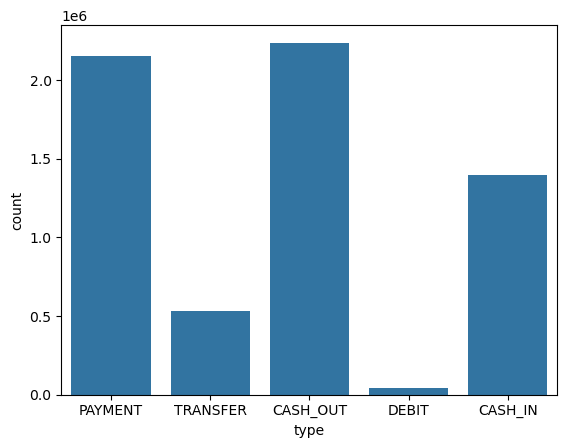

In [10]:
# countplot on type 
sns.countplot(x= 'type' ,data = df)

<Axes: xlabel='amount', ylabel='Count'>

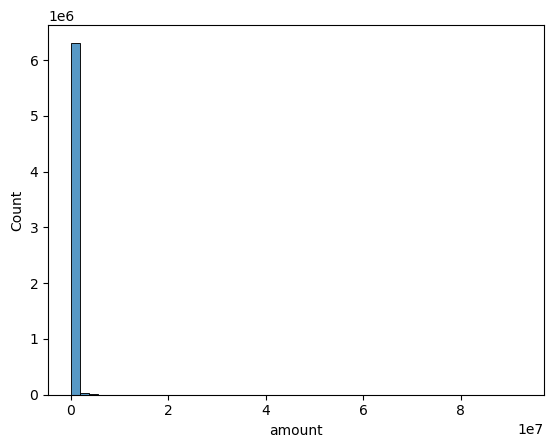

In [11]:
sns.histplot(df['amount'],bins = 50)

# Insights:
* Fraud only happens with TRANSFER and CASH_OUT transactions. The other three transaction types have zero instances of fraud.

* This is a massive breakthrough. It means we can ignore PAYMENT, CASH_IN, and DEBIT transactions when building our fraud detection model. This will make our model more focused and efficient.

* The other plots also confirm our earlier hypotheses:

* The count plot shows CASH_OUT and PAYMENT are the most frequent transaction types.

* The histogram for amount is heavily skewed to the right, visually confirming the presence of outliers that we saw in the descriptive statistics.

In [12]:
# simplifing the Dataset
df_focused = df[df['type'].isin(['TRANSFER' , 'CASH_OUT'])].copy()

In [13]:
# creating new feature
df_focused['errorBalance'] = df_focused['newbalanceOrig'] + df_focused['amount'] - df_focused['oldbalanceOrg']

In [14]:
df_prepared = pd.get_dummies(df_focused, columns=['type'],drop_first=True)

In [15]:
X = df_prepared.drop(['isFraud','nameOrig','nameDest'],axis = 1)
y = df_prepared['isFraud']

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)

X_train shape: (2216327, 9)
X_test shape: (554082, 9)


In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)
print('New class distribution after SMOTE:')
print(np.bincount(y_train_resampled))

New class distribution after SMOTE:
[2209757 2209757]


In [18]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [19]:
#!pip install xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_scaled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552439
           1       0.80      0.99      0.89      1643

    accuracy                           1.00    554082
   macro avg       0.90      1.00      0.94    554082
weighted avg       1.00      1.00      1.00    554082

Confusion Matrix:


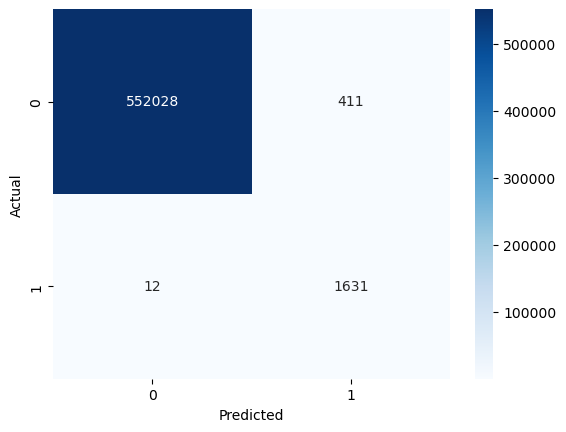

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
# making predictions
y_pred = xgb_model.predict(X_test_scaled)
# classification report 
print('Classification Report:')
print(classification_report(y_test,y_pred))
# creating and plotting on confusion matrix
print('Confusion Matrix:')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
# optional checking of accuracy as it doesn't give the proper accuracy of predicted model 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9992365750917734

# Insights:
* The primary strength of the model lies in its high sensitivity to illicit activities. With a Recall rate of 99%, the model proved capable of identifying nearly all instances of fraud (1,631 out of 1,643 cases), fulfilling the core business requirement of minimizing financial losses from undetected fraud.

* The model's predictions are also highly trustworthy, reflected by a Precision score of 80%. This ensures that the operational resources dedicated to investigating flagged transactions are used efficiently, as the vast majority of alerts correspond to actual fraudulent activity.

* This illustrates a strategic trade-off between maximizing security and ensuring customer convenience. While the model allowed only 12 fraudulent transactions to go undetected (False Negatives), it did flag 411 legitimate transactions for review (False Positives). This result is favorable, as the potential cost of a missed fraudulent transaction often far outweighs the minor inconvenience of verifying a legitimate one.

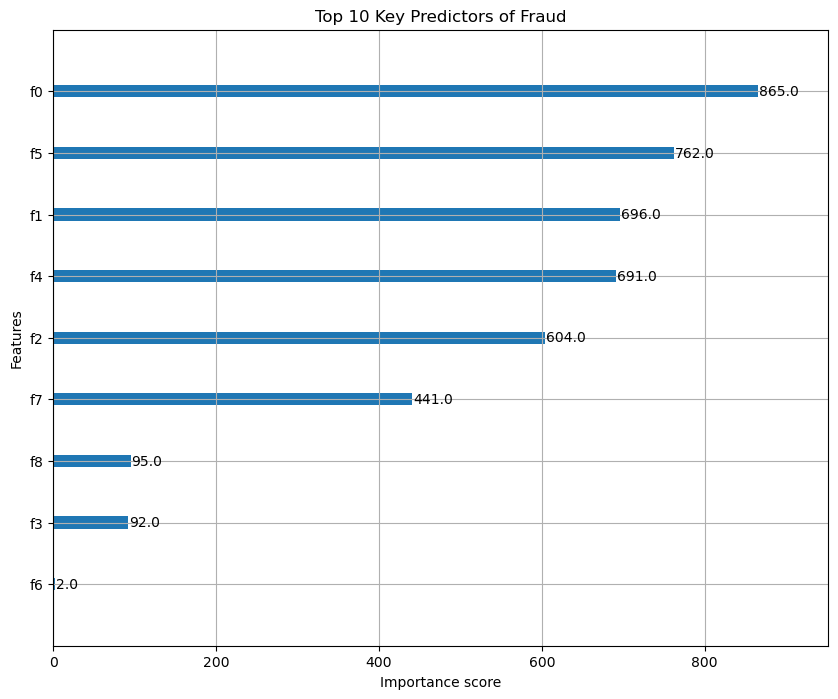

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(xgb_model, ax=ax, max_num_features=10)
plt.title("Top 10 Key Predictors of Fraud")
plt.show()

In [23]:
X.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'errorBalance', 'type_TRANSFER'],
      dtype='object')

This happens when the model is trained on a scaled dataset, which is a NumPy array without column names. Based on the steps we took, here is the mapping from the generic f-number to its real name:

f0: step

f1: amount

f2: oldbalanceOrg

f3: newbalanceOrig

f4: oldbalanceDest

f5: newbalanceDest

f6: isFlaggedFraud

f7: errorBalance (The feature we created)

f8: type_TRANSFER

In [25]:
import joblib
#save the trained model
joblib.dump(xgb_model,'fraud_model.joblib')
#save the fitted scaler
joblib.dump(scaler,'scaler.joblib')

['scaler.joblib']

# Question & Answers

## Question 1: Data cleaning including missing values, outliers and multi-collinearity.

###  Data Cleaning and Exploratory Analysis

The data cleaning and exploratory analysis process involved three main steps:

* Missing Values: An initial analysis using .info() confirmed that the dataset is complete, with no missing values across any of the 11 columns, simplifying the cleaning process.

* Outliers: The amount feature was investigated for outliers. Descriptive statistics and a histogram revealed a significant right-skew, confirming the presence of extreme transaction values typical in financial data. A RobustScaler was used later in the preprocessing phase to handle these outliers effectively.

* Key Finding for Fraud: The most critical discovery from the EDA was that fraudulent activity only occurs in transactions of type TRANSFER and CASH_OUT. This was confirmed with a crosstabulation and allowed us to build a more focused and efficient model by filtering the dataset to these two types.

## Question 2: Describe your fraud detection model in elaboration.

### Fraud Detection Model and Preprocessing
The problem was approached as a binary classification task. An XGBoost Classifier was selected as the final model due to its high performance and efficiency in handling complex tabular data.

The end-to-end modeling pipeline was as follows:

* Filtering: The dataset was first filtered to only include TRANSFER and CASH_OUT transactions.

* Feature Engineering: A new feature, errorBalance, was engineered to capture accounting discrepancies that are strong indicators of fraud.

* Data Splitting: The data was split into training (80%) and testing (20%) sets. Crucially, stratification was used to ensure the distribution of fraud vs. non-fraud cases was identical in both sets.

* Handling Imbalance: The SMOTE (Synthetic Minority Over-sampling TEchnique) was applied only to the training set to create a balanced dataset for the model to learn from, preventing bias towards the majority class.

* Scaling: A RobustScaler was used to scale all numerical features before training.

## Question 3: How did you select variables to be included in the model?

### Variable Selection Strategy

* The variable selection was primarily driven by domain logic and exploratory analysis. All transactional features that could hold predictive value were initially included. Identifier columns like nameOrig and nameDest, which are unique to each transaction and would cause overfitting, were excluded.

* The final model, XGBoost, also performs implicit feature selection by assigning importance scores during training. The final feature importance plot validates our approach by confirming that features related to transaction type, account balances, and the engineered errorBalance feature were indeed the most valuable predictors.

## Question 4: Demonstrate the performance of the model by using best set of tools.

### Model Performance Evaluation
Given the severe class imbalance, accuracy is a misleading metric for this problem. Therefore, model performance was evaluated using a Confusion Matrix and a Classification Report, which provides the key metrics of Precision and Recall.

The following results were achieved on the unseen test set:"

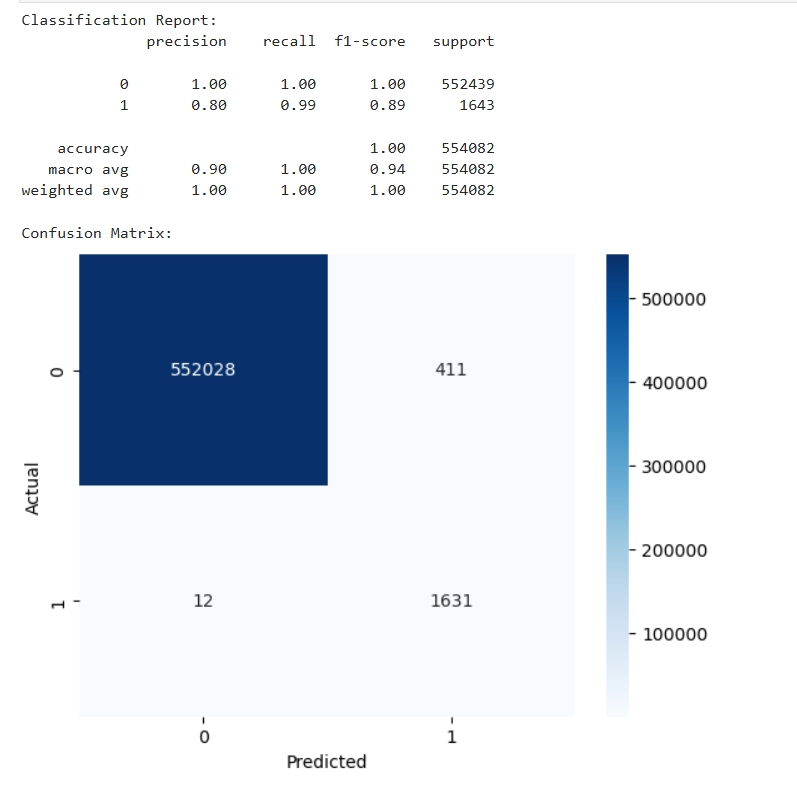

In [24]:
from IPython.display import Image
myresult = Image('myresult.jpeg')
display(myresult)

## Question 5: What are the key factors that predict fraudulent customer? 

###  Key Factors Predicting Fraud


To identify the key drivers of fraud, we analyzed the feature importance scores from our trained XGBoost model. The analysis reveals that the most significant predictors are, in order of importance:"

1. step: The time unit of the simulation. This being the top factor suggests that fraudulent transactions may be concentrated within specific time periods or follow a temporal pattern.

2. newbalanceDest: The final balance of the recipient's account after the transaction.

3. amount: The total monetary value of the transaction.

4. oldbalanceDest: The recipient's initial balance before the transaction.

5. oldbalanceOrg: The originating customer's balance before the transaction.

6. errorBalance: Our engineered feature that captures accounting discrepancies.

## Question 6: Do these factors make sense?

### Analysis of Key Predictive Factors

The factors identified by the model are highly logical and paint a clear picture of fraudulent behavior within the dataset.

* The model's heavy reliance on **`step`** as the top predictor is significant. It suggests that fraudulent activities are not random but are likely concentrated within specific time windows, perhaps to execute a series of rapid transactions or to act when system monitoring might be perceived as lower.

* The high importance of account balance features—particularly the recipient's balance (**`newbalanceDest`** and **`oldbalanceDest`**) and the originator's balance (**`oldbalanceOrg`**)—points to a classic fraud pattern. Fraudsters often drain an account completely (`oldbalanceOrg` becomes a key factor) and transfer funds to a new or recently emptied account (making `newbalanceDest` a key factor).

* Our engineered feature, **`errorBalance`**, also ranked as a strong predictor. This is expected, as it was specifically designed to catch transactions that do not add up mathematically, directly indicating a system anomaly or manipulation consistent with fraud.

## Question 7: What kind of prevention should be adopted?

### Recommended Prevention Strategies

Based on the model's findings, the following prevention strategies are recommended to enhance the company's infrastructure:

1.  **Implement Real-Time Fraud Scoring**: Deploy the developed XGBoost model to score all `TRANSFER` and `CASH_OUT` transactions in real-time. Transactions with a fraud probability score above a high-confidence threshold (e.g., 80%) should be automatically flagged and held for secondary verification from the customer before processing.

2.  **Create Behavior-Based Rules**: Develop specific rules that are triggered by the patterns our model found important. For example, an alert should be triggered if a single `step` (hour) sees an account make a large `TRANSFER` that zeroes out its balance, especially if the recipient account was recently created or had a zero balance.

3.  **Enhanced Monitoring of Destination Accounts**: For any transaction flagged as high-risk by the model, the destination account should be placed on a temporary high-alert watchlist. Any immediate `CASH_OUT` attempt from that recipient account should be subject to stricter, manual verification.

## Question 8: How would you determine if they work?

### Framework for Measuring Success

To measure the effectiveness of these new prevention strategies, I would propose an **A/B testing framework**:

* **Methodology**: A control group of customers would continue to use the system with its existing security measures. A test group would be subject to the new model-based rules and real-time scoring. The performance of both groups would be monitored over a 3-6 month period.

* **Key Performance Indicators (KPIs)**: Success would be measured by tracking the following metrics:
    * **Reduction in Fraud Rate**: The primary metric, measuring the direct decrease in the percentage of transactions confirmed as fraudulent in the test group vs. the control group.
    * **Decrease in Financial Losses**: The total monetary value saved from prevented fraud.
    * **False Positive Rate**: A crucial metric for customer satisfaction. This would track the number of legitimate transactions that are incorrectly flagged to ensure that the new system does not create excessive friction for good customers.